In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv


math = pd.read_csv(
    '/content/drive/MyDrive/Study_Based_Recommendation/student-mat.csv',
    delimiter=';',
    quoting=csv.QUOTE_NONE,
    on_bad_lines='skip'  # Skip malformed lines
)

print(math.head())
print(math.columns)


  school    sex  age address  famsize Pstatus  Medu  Fedu         Mjob  \
0    "GP  ""F""   18   ""U""  ""GT3""   ""A""     4     4  ""at_home""   
1    "GP  ""F""   17   ""U""  ""GT3""   ""T""     1     1  ""at_home""   
2    "GP  ""F""   15   ""U""  ""LE3""   ""T""     1     1  ""at_home""   
3    "GP  ""F""   15   ""U""  ""GT3""   ""T""     4     2   ""health""   
4    "GP  ""F""   16   ""U""  ""GT3""   ""T""     3     3    ""other""   

           Fjob  ... famrel freetime  goout  Dalc  Walc health absences  \
0   ""teacher""  ...      4        3      4     1     1      3        6   
1     ""other""  ...      5        3      3     1     1      3        4   
2     ""other""  ...      4        3      2     2     3      3       10   
3  ""services""  ...      3        2      2     1     1      5        2   
4     ""other""  ...      4        3      2     1     2      5        4   

       G1      G2   G3  
0   ""5""   ""6""   6"  
1   ""5""   ""5""   6"  
2   ""7""   ""8""  10"  
3  "

In [ ]:
# Remove double quotes from all string columns
for col in math.select_dtypes(include=['object']).columns:
    math[col] = math[col].str.replace('"', '', regex=False)

# Convert numeric columns (G1, G2, G3, studytime, absences, etc.) to numeric type
numeric_cols = ['studytime', 'absences', 'G1', 'G2', 'G3']
for col in numeric_cols:
    math[col] = pd.to_numeric(math[col], errors='coerce')

# Check the cleaned data
print(math[numeric_cols].head())
print(math.dtypes)


   studytime  absences  G1  G2  G3
0          2         6   5   6   6
1          2         4   5   5   6
2          2        10   7   8  10
3          3         2  15  14  15
4          2         4   6  10  10
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [ ]:
features = ['studytime', 'absences', 'G3']
X = math[features].dropna()
print("Shape of input features:", X.shape)

Shape of input features: (415, 3)


In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.36840152 0.33956475]


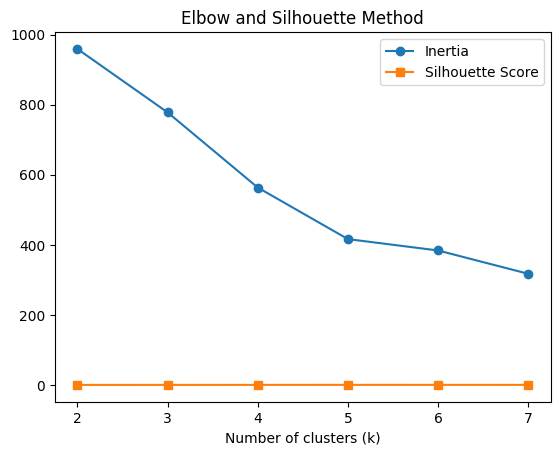

In [ ]:


inertia = []
silhouette = []
K_range = range(2, 8)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(K_range, inertia, 'o-', label='Inertia')
plt.plot(K_range, silhouette, 's-', label='Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.title('Elbow and Silhouette Method')
plt.legend()
plt.show()


In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [ ]:
math = math.loc[X.index]  # Align index
math['cluster'] = labels

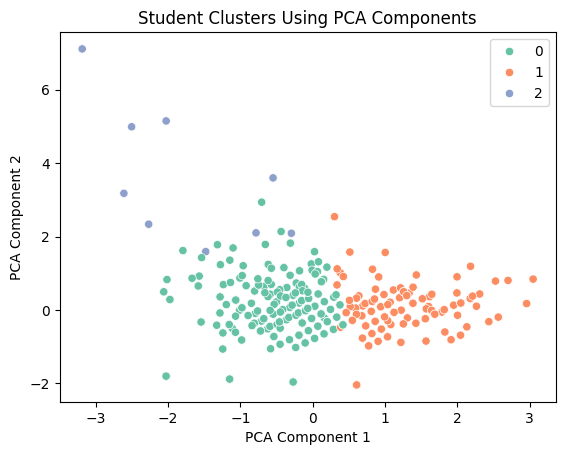

In [ ]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2')
plt.title('Student Clusters Using PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

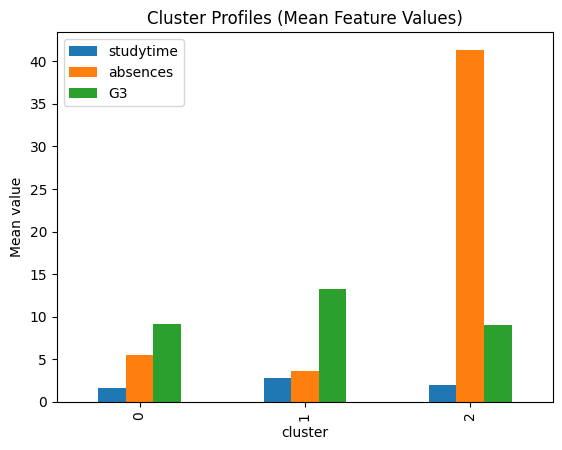

In [ ]:
cluster_means = math.groupby('cluster')[features].mean()
cluster_means.plot(kind='bar')
plt.title('Cluster Profiles (Mean Feature Values)')
plt.ylabel('Mean value')
plt.show()

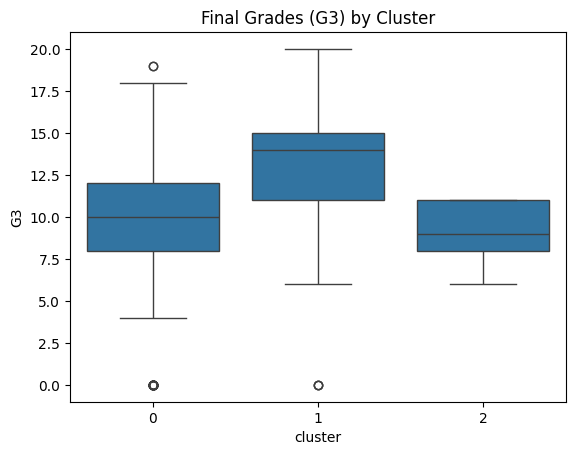

In [ ]:
sns.boxplot(x=math['cluster'], y=math['G3'])
plt.title('Final Grades (G3) by Cluster')
plt.show()